<a href="https://colab.research.google.com/github/wellmej/DataScienceUseCases/blob/main/Case3_My_Sales_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#  Not needed - read direct from my Google Collab

TASK #2.1: IMPORT SALES TRAINING DATA

In [3]:
# You have to include the full link to the csv file containing your dataset
# You have to include the full link to the csv file containing your dataset

# You have to include the full link to the csv file containing your dataset - upload file to Google Collab first instead!!!
# C:\Users\jrwel\Documents\Udemy\Data Science Real-World Case Studies\Data\Case3

#training_dir  = "C:/Users/jrwel/Documents/Udemy/Data Science Real-World Case Studies/Data/Case3/"

#training_file_complete = training_dir + training_file

#------------------------------------------------
# Upload to Google Colllab and read from there
#------------------------------------------------
training_file = "train.csv"
sales_train_df = pd.read_csv(training_file)
sales_train_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
784446,272,7,2013-07-28,0,0,0,0.0,0,1.0
784447,273,7,2013-07-28,0,0,0,0.0,0,0.0
784448,274,7,2013-07-28,6221,1348,1,0.0,0,1.0
784449,275,7,2013-07-28,0,0,0,0.0,0,0.0


In [4]:
sales_train_df.head(5)
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable (In Euros, not dollars)
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0


In [5]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
784441,267,7,2013-07-28,0,0,0,0.0,0,0.0
784442,268,7,2013-07-28,0,0,0,0.0,0,1.0
784443,269,7,2013-07-28,0,0,0,0.0,0,0.0
784444,270,7,2013-07-28,0,0,0,0.0,0,0.0
784445,271,7,2013-07-28,0,0,0,0.0,0,0.0
784446,272,7,2013-07-28,0,0,0,0.0,0,1.0
784447,273,7,2013-07-28,0,0,0,0.0,0,0.0
784448,274,7,2013-07-28,6221,1348,1,0.0,0,1.0
784449,275,7,2013-07-28,0,0,0,0.0,0,0.0
784450,276,7,2013-07-28,0,0,0,NaN,NaN,NaN


In [6]:
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784451 entries, 0 to 784450
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          784451 non-null  int64  
 1   DayOfWeek      784451 non-null  int64  
 2   Date           784451 non-null  object 
 3   Sales          784451 non-null  int64  
 4   Customers      784451 non-null  int64  
 5   Open           784451 non-null  int64  
 6   Promo          784450 non-null  float64
 7   StateHoliday   784450 non-null  object 
 8   SchoolHoliday  784450 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 53.9+ MB


In [7]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,784451.000000,784451.000000,784451.000000,784451.000000,784451.000000,784450.000000,784450.000000
mean,558.410185,3.994637,5855.899947,638.103971,0.831290,0.381006,0.185976
std,321.962624,1.998829,3889.246860,466.165458,0.374496,0.485634,0.389088
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3795.000000,411.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5822.000000,614.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7955.000000,842.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


TASK #2.2: IMPORT STORE INFORMATION DATA

In [8]:

# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#-----------------------------------------------------------
# Upload data file to Google Colllab and read from there
#-----------------------------------------------------------
store_file = "store.csv"
store_info_df = pd.read_csv(store_file)
store_info_df


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# on average, the competition distance is 5404 meters away (5.4 kms)
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

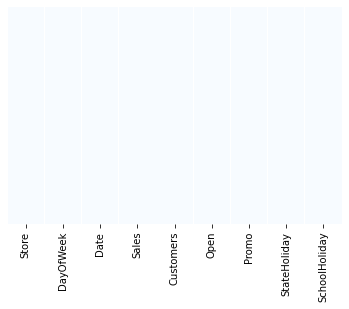

In [13]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f324b710630>,
      dtype=object)

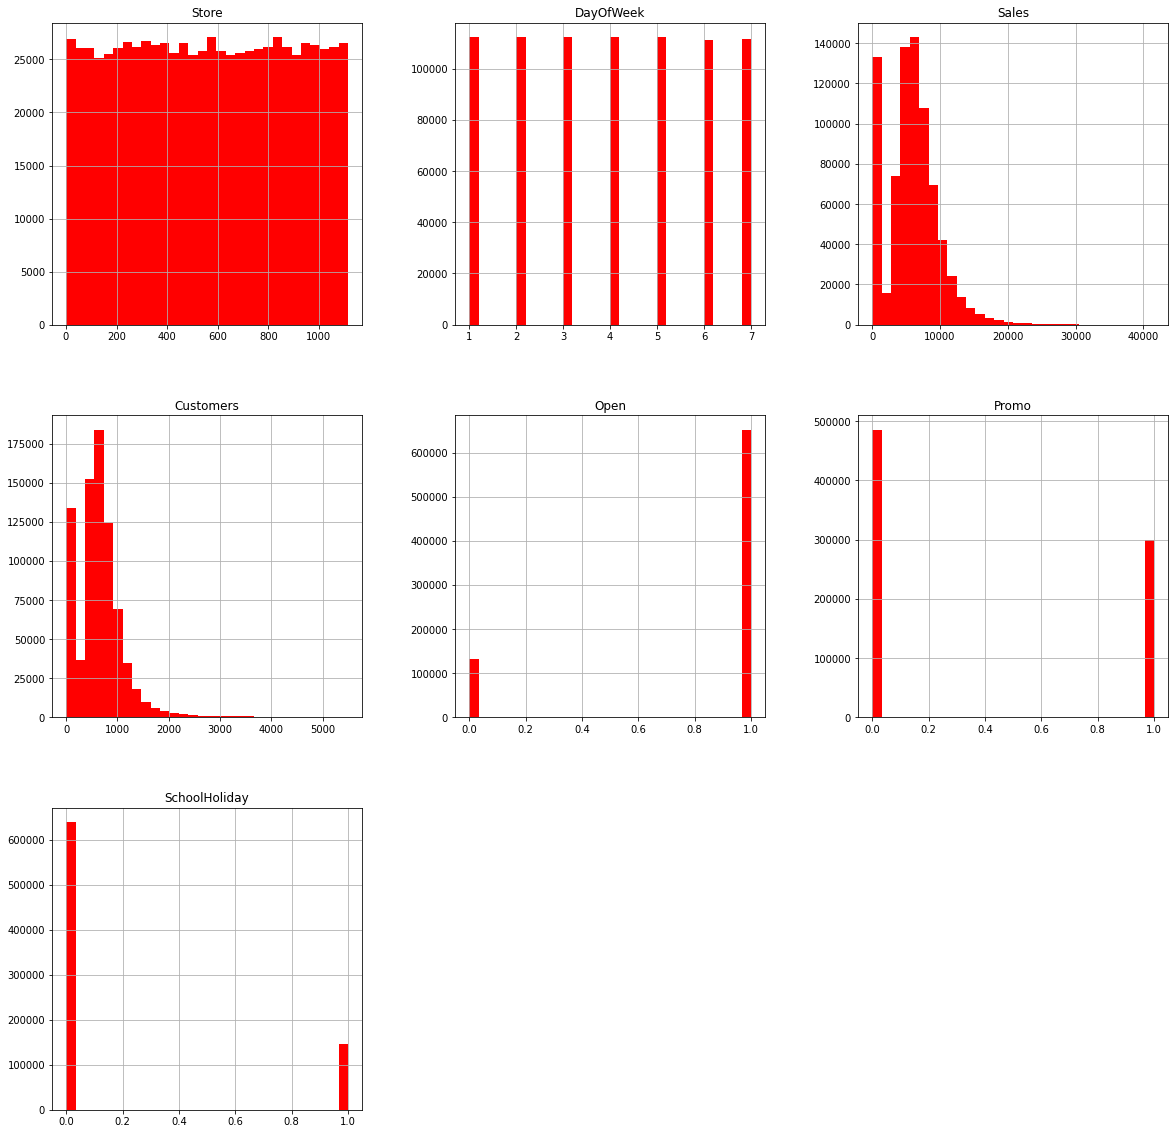

In [14]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

sales_train_df.hist(bins = 30, figsize = (20,20), color = 'r')

In [16]:
#-----------------------------------------------
#  Maximum number of customers
#-----------------------------------------------
sales_train_df['Customers'].max()

5494

In [18]:
# Let's see how many stores are open and closed! 
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [21]:
#---------------------------------------------------
#  Print number of Total stores, and then Open
#  and CLosed stores
#---------------------------------------------------
print ('Total Stores: ', len(sales_train_df))
print ('Open Stores: ', len(open_train_df))
print ('Closed Stores: ', len(closed_train_df))

Total Stores:  784451
Open Stores:  652106
Closed Stores:  132345


In [22]:
open_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
784296,122,7,2013-07-28,4558,578,1,0.0,0,0.0
784383,209,7,2013-07-28,2366,274,1,0.0,0,0.0
784433,259,7,2013-07-28,12264,2560,1,0.0,0,1.0
784436,262,7,2013-07-28,28107,4747,1,0.0,0,0.0


In [19]:
# Count the number of stores that are open and closed
closed_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1.0,0,1.0
875,876,5,2015-07-31,0,0,0,1.0,0,1.0
1406,292,4,2015-07-30,0,0,0,1.0,0,1.0
1990,876,4,2015-07-30,0,0,0,1.0,0,1.0
2521,292,3,2015-07-29,0,0,0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
784445,271,7,2013-07-28,0,0,0,0.0,0,0.0
784446,272,7,2013-07-28,0,0,0,0.0,0,1.0
784447,273,7,2013-07-28,0,0,0,0.0,0,0.0
784449,275,7,2013-07-28,0,0,0,0.0,0,0.0


In [23]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [24]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
784296,122,7,2013-07-28,4558,578,1,0.0,0,0.0
784383,209,7,2013-07-28,2366,274,1,0.0,0,0.0
784433,259,7,2013-07-28,12264,2560,1,0.0,0,1.0
784436,262,7,2013-07-28,28107,4747,1,0.0,0,0.0


In [25]:
# Let's drop the open column since it has no meaning now
#  inplace True: remove the data from the data frame
sales_train_df.drop(['Open'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1.0,0,1.0
1,2,5,2015-07-31,6064,625,1.0,0,1.0
2,3,5,2015-07-31,8314,821,1.0,0,1.0
3,4,5,2015-07-31,13995,1498,1.0,0,1.0
4,5,5,2015-07-31,4822,559,1.0,0,1.0
...,...,...,...,...,...,...,...,...
784296,122,7,2013-07-28,4558,578,0.0,0,0.0
784383,209,7,2013-07-28,2366,274,0.0,0,0.0
784433,259,7,2013-07-28,12264,2560,0.0,0,1.0
784436,262,7,2013-07-28,28107,4747,0.0,0,0.0


In [27]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,652106.000000,652106.00000,652106.000000,652106.000000,652106.000000,652106.000000
mean,558.519998,3.50988,7044.355625,767.607257,0.446182,0.202254
std,321.793769,1.72599,3134.358185,402.499228,0.497096,0.401681
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.00000,4925.000000,523.000000,0.000000,0.000000
50%,558.000000,3.00000,6447.000000,680.000000,0.000000,0.000000
75%,838.000000,5.00000,8465.000000,898.000000,1.000000,0.000000
max,1115.000000,7.00000,41551.000000,5494.000000,1.000000,1.000000


TASK #3.2: EXPLORE STORES INFORMATION DATA

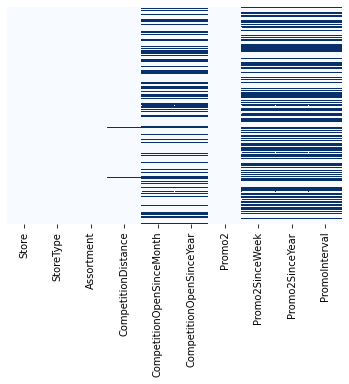

In [28]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [29]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [30]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [32]:
#-----------------------------------------------------------------------
# Examine data when Promo2 is equal to zero.
# What do other columns have? (All other 'Promo2' type fields are Nan)
#-----------------------------------------------------------------------
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']


In [35]:
for str in str_cols:
  store_info_df[str].fillna(0, inplace = True)

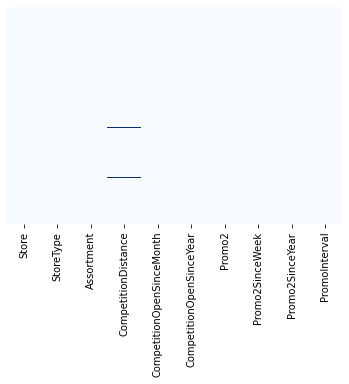

In [36]:
# Let's see again about the missing data after the above loop
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [37]:
# There are now 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

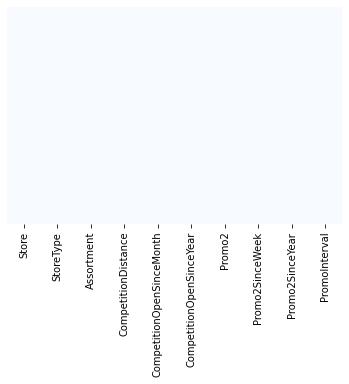

In [38]:
# Let's plot Heatmap again about to see any missing data after the above command
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f324a494ba8>,
      dtype=object)

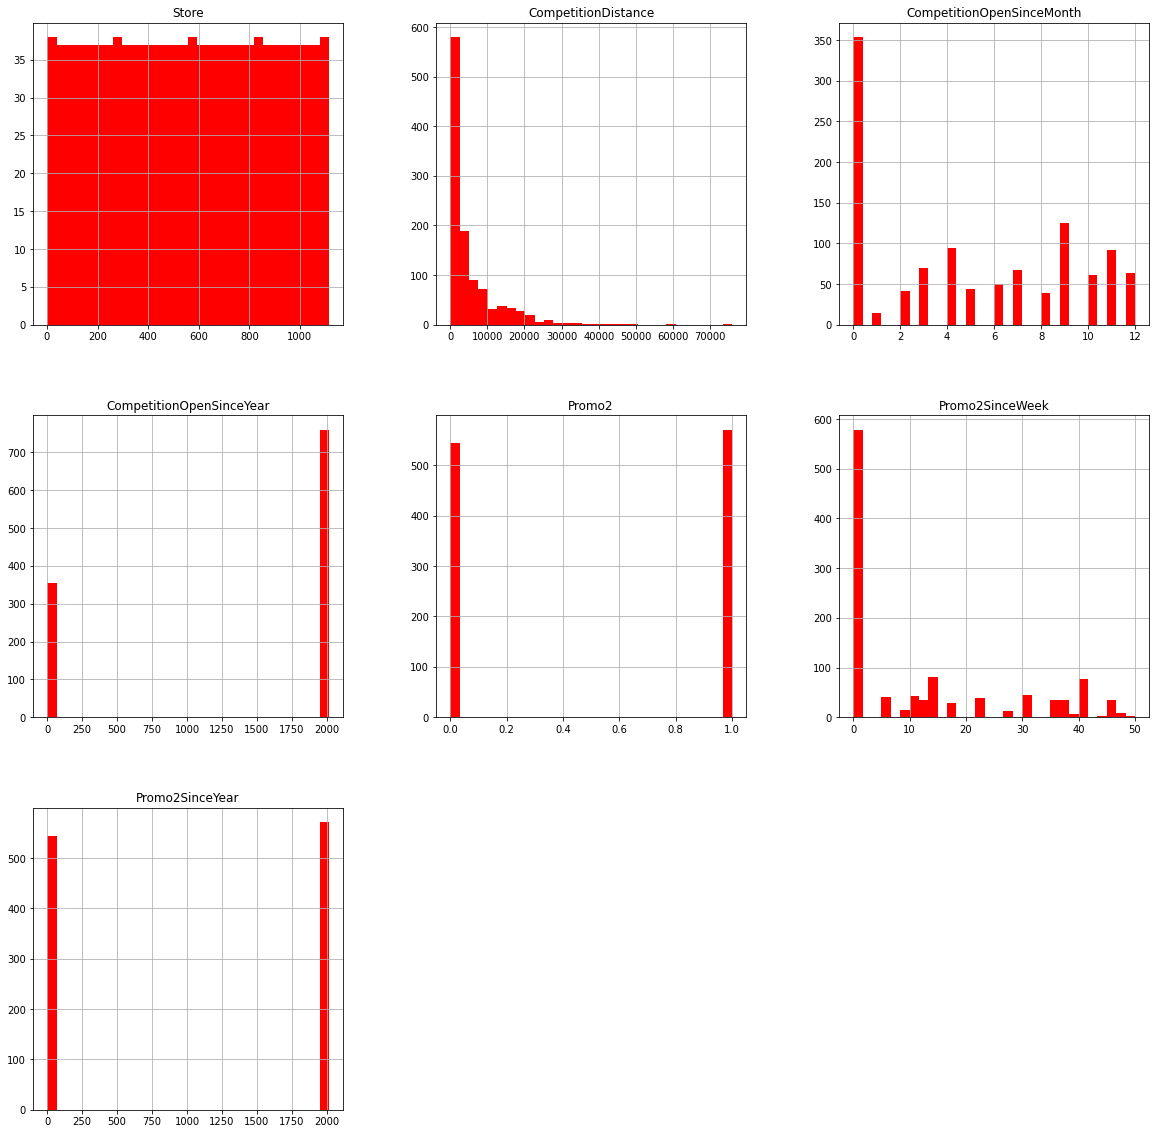

In [39]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
store_info_df.hist(bins = 30, figsize = (20,20), color = 'r')

TASK #3.3: EXPLORE MERGED DATASET 

In [ ]:
# Let's merge both data frames together based on 'store'


In [ ]:

# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

In [ ]:

# Customers/Prmo2 and sales are strongly correlated 

In [ ]:
# Let's separate the year and put it into a separate column 


In [ ]:
# Let's do the same for the Day and Month


In [ ]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe



In [ ]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month



In [ ]:
# Let's do the same for the day of the week  (note that 7 = Sunday)



# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [ ]:
# import prophet 

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [ ]:
# Get all the dates pertaining to school holidays 


In [ ]:
# Get all the dates pertaining to state holidays 


In [ ]:
# concatenate both school and state holidays 


In [ ]:
# Let's make predictions using holidays for a specific store


# EXCELLENT JOB!